<a href="https://colab.research.google.com/github/uandersonricardo/kmeans-college-clustering/blob/main/Kmeans_mp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-médias - Clusterização de universidades**
#### Centro de Informática - UFPE
#### Miniprojeto 3 - Sistemas Inteligentes

#### Prof. Germano Crispim Vasconcelos

#### Equipe
- Alexandre Burle (aqb)
- Danilo Vaz (dvma)
- Matheus Andrade (mvtna)
- Uanderson Ricardo (urfs)

# Proposta
A proposta do projeto é utilizar o algoritmo K-médias em cima de um conjunto de dados com **informações sobre universidades dos Estados Unidos** com o objetivo de agrupar quais são privadas e quais não são. O dataset utilizado pode ser acessado através desse [link](https://raw.githubusercontent.com/uandersonricardo/kmeans-college-clustering/main/College.csv).

# Bibliotecas
Para o desenvolvimento do projeto, foram utilizadas as seguintes bibliotecas. 
- Pandas: para manipulação dos dados estruturados durante o pré-processamento;
- Numpy: para manipulação dos dados estruturados em forma de matrizes e arrays multidimensionais;
- Matplotlib e Seaborn: para visualização dos gráficos referentes ao aprendizado da rede.
- Scikit-Learn: para rodar o K-médias e atingir a solução do problema;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Passo 1 - Dataset
Em primeiro lugar, foi feita a importação do dataset (comentado e referenciado na primeira seção deste notebook/documento). Assim, com o dataset importado, pode-se analisar como os dados estão estruturados. Percebe-se que existem 18 colunas de características e uma coluna com a classe (_Private_).

In [ ]:
url = 'https://raw.githubusercontent.com/uandersonricardo/kmeans-college-clustering/main/College.csv'
df = pd.read_csv(url)

In [ ]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


# Passo 2 - Pré-Processamento
A coluna _"Unnamed: 0"_ contém o nome da universidade e não foi utilizada como característica para o agrupamento. Portanto, essa coluna foi excluída do _dataframe_.

Além disso, a coluna _"Private"_ era representada por uma string de valor _"Yes"_ ou _"No"_. Foi utilizada a função _factorize()_ para converter o _"Yes"_ em 1 e o _"No"_ em 0.

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df['Private'] = 1 - pd.factorize(df['Private'])[0]
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Passo 3 - Visualização dos dados
Para uma melhor compreensão do _dataset_, foram plotados alguns gráficos relacionando as variáveis.

A seguir, temos os gráficos:
- _Graduation rate_ x _Room and board costs_
- _Out-of-state tuition_ x _Number of full-time undergraduates_
- _Out-of-state tuition_ x _Number of part-time undergraduates_
- _Out-of-state tuition_

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


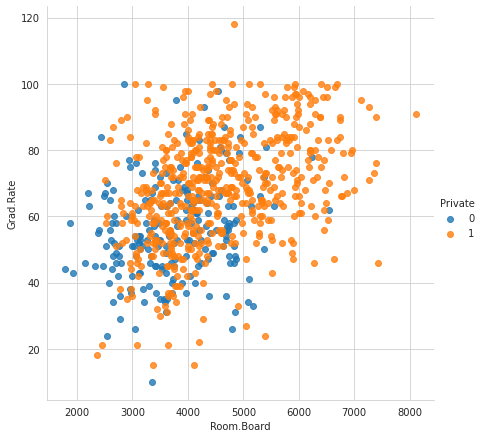

In [30]:
sns.lmplot('Room.Board', 'Grad.Rate', data=df, size=6, hue='Private', aspect=1, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


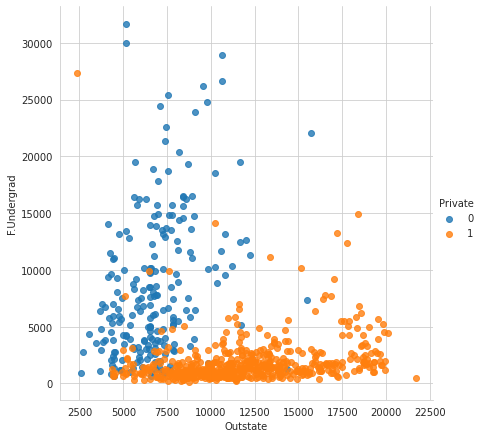

In [31]:
sns.lmplot('Outstate', 'F.Undergrad', data=df, hue='Private', size=6, aspect=1, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


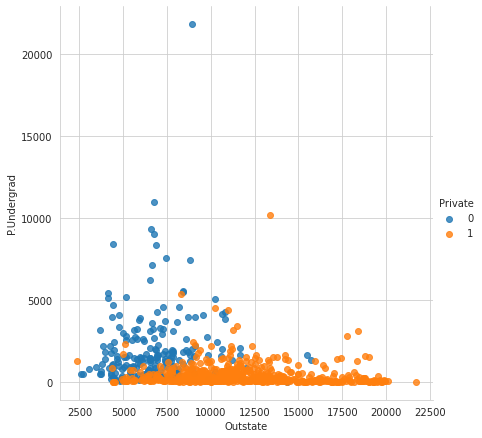

In [39]:
sns.lmplot('Outstate', 'P.Undergrad', data=df, hue='Private', size=6, aspect=1, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


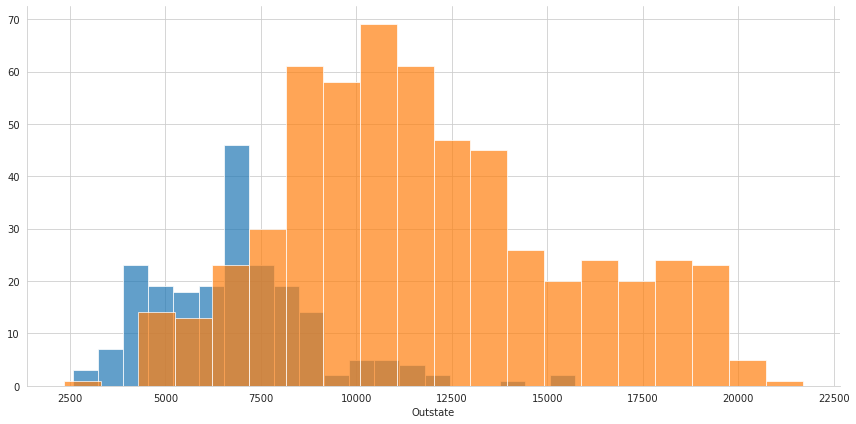

In [40]:
g = sns.FacetGrid(df, hue="Private", size=6, aspect=2)
g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

# Passo 4 - Datasets de Treino e Teste
Com os dados pré-processados, deve-se separar as amostras em dois grupos diferentes: o dataset de treino e o dataset de teste. Para isso, faz-se o 'shuffle' do dataset pré-processado para embaralhar as amostras. Com o dataset embaralhado, define-se um ponto de quebra nos dados, para separar os datasets. O valor definido aqui foi de 80% dos dados para treino e 20% dos dados para teste.

In [ ]:
df = df.sample(frac=1)

x = df.drop(['Private'], axis=1)
y = df['Private']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Passo 5 - Modelo
Como modelo para a clusterização, foi escolhido um K-médias com parâmetro K igual a 2. Tal parâmetro foi determinado com base no número de classes, que já sabemos previamente.

Em seguida, o algoritmo foi treinado através da função _fit()_. 


In [ ]:
kmeans = KMeans(n_clusters=2, random_state = 10)
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

# Passo 8 - Teste
Por fim, com o modelo estruturado e treinado, é hora de testá-lo. Para isso, basta utilizar o dataset de teste que foi separado no início deste notebook/documento e usá-lo a avaliação do modelo.
Executando a célula a seguir, são apresentados os valores de _precision_, _recall_ e o _F1 Score_ no dataset de teste.


In [ ]:
predicted = kmeans.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56        41
           1       0.83      0.96      0.89       115

    accuracy                           0.82       156
   macro avg       0.80      0.70      0.72       156
weighted avg       0.82      0.82      0.80       156



# Passo 9 - Visualização de dados nos clusters
A seguir, foram plotados alguns gráficos usando não mais a classe _"Private"_ do _dataset_, mas o cluster que o algoritmo K-médias alocou cada registro:
- _Graduation rate_ x _Room and board costs_ (no conjunto de treino)
- _Graduation rate_ x _Room and board costs_ (no conjunto de testes)
- _Out-of-state tuition_ x _Number of full-time undergraduates_ (no conjunto de treino)
- _Out-of-state tuition_ x _Number of full-time undergraduates_ (no conjunto de testes)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


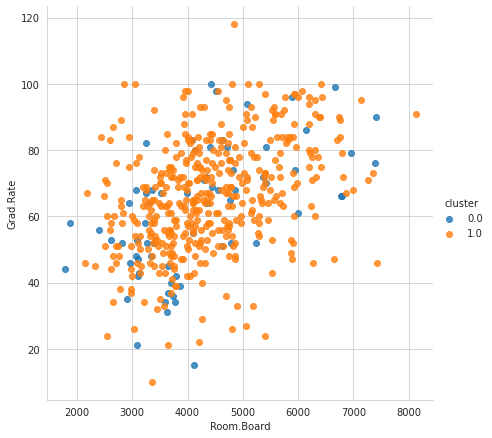

In [25]:
df_clusters_train = pd.DataFrame()
df_clusters_train.loc[:,"cluster"] = pd.Series(kmeans.labels_)
df_clusters_train = pd.concat([df_clusters_train, x_train], axis=1)

sns.lmplot('Room.Board', 'Grad.Rate', data=df_clusters_train, hue="cluster", size=6, aspect=1, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


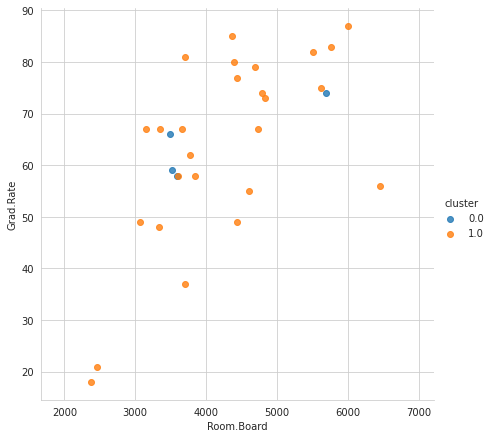

In [27]:
df_clusters_test = pd.DataFrame()
df_clusters_test.loc[:,"cluster"] = pd.Series(predicted)
df_clusters_test = pd.concat([df_clusters_test, x_test],axis=1)

sns.lmplot('Room.Board', 'Grad.Rate', data=df_clusters_test, hue="cluster", size=6, aspect=1, fit_reg=False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


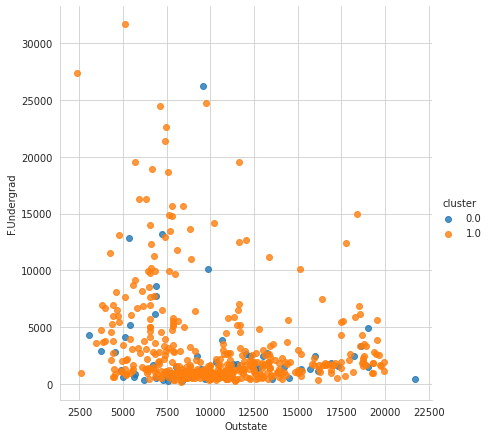

In [57]:
df_clusters_train = pd.DataFrame()
df_clusters_train.loc[:,"cluster"] = pd.Series(kmeans.labels_)
df_clusters_train = pd.concat([df_clusters_train, x_train], axis=1)

g = sns.lmplot('Outstate', 'F.Undergrad', data=df_clusters_train, hue="cluster", size=6, aspect=1, fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


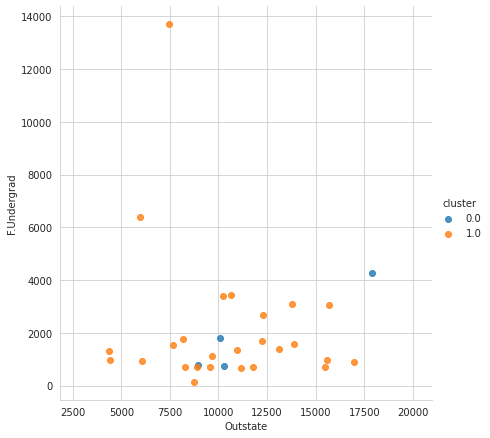

In [58]:
df_clusters_test = pd.DataFrame()
df_clusters_test.loc[:,"cluster"] = pd.Series(predicted)
df_clusters_test = pd.concat([df_clusters_test,x_test],axis=1)

sns.lmplot('Outstate', 'F.Undergrad', data=df_clusters_test, hue="cluster", size=6, aspect=1, fit_reg=False)